**Exercise project 1 – ANN for regression**.  

In [6]:

pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:

import pandas as pd, csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

#pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

In [8]:
import pandas as pd
import csv

df = pd.read_csv(
    "laptop_price.csv",
    sep=",",
    engine="python",
    encoding="cp1252",   # ✅ FIX
    on_bad_lines="skip"
)

In [9]:

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [10]:

df = df.drop(columns=['laptop_ID'])

In [11]:

df.describe(include='object')

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,618,6,40,118,9,39,110,9,179
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,30,727,507,190,619,412,281,1072,121


In [12]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [13]:

data = df.select_dtypes(include=['object'])

for column in ["Company", "TypeName", "ScreenResolution", "OpSys"]:
    print(data[column].value_counts())
    print('--------------------------------')

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
--------------------------------
TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64
--------------------------------
ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              1

In [14]:

result = pd.concat([data, df['Inches']], axis=1).fillna(0)
data = result

In [15]:

# With low counts, we will remove them
brands = ["Samsung", "Razer", "Mediacom", "Microsoft",
          "Xiaomi", "Vero", "Google", "Fujitsu",
          "LG", "Chuwi", "Huawei"]

# Filtrer le DataFrame
data = data[~data["Company"].isin(brands)]

In [16]:

import re

def extract_resolution(text):
    match = re.search(r'(\d{3,4}x\d{3,4})', text)
    return match.group(1) if match else None

data["Resolution"] = data["ScreenResolution"].apply(extract_resolution)
data = data.drop(columns=["ScreenResolution"])
data["ScreenResolution"] = data["Resolution"]
data = data.drop(columns=["Resolution"])
data["ScreenResolution"].value_counts()

/var/folders/n8/nvm27clx6dz0_pkssl20wnnm0000gn/T/ipykernel_14928/2128901196.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Resolution"] = data["ScreenResolution"].apply(extract_resolution)


ScreenResolution
1920x1080    813
1366x768     303
3840x2160     39
3200x1800     27
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
1440x900       4
2880x1800      4
1920x1200      4
Name: count, dtype: int64

In [17]:

data["Company"].value_counts()

Company
Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Toshiba     48
Apple       21
Name: count, dtype: int64

In [18]:

Systems = {
"Windows 10":      "Windows",
"Windows 7":       "Windows",
"Windows 10 S":    "Windows",
"Linux":          "Linux",
"Chrome OS":     "Chrome OS",
"macOS":          "macOS",
"Mac OS X":     "macOS",
"No OS":         "No OS",
"Android":     "Android"
}
data["OpSys"] = data["OpSys"].map(Systems)

In [19]:

data["OpSys"].value_counts()

OpSys
Windows      1082
No OS          63
Linux          62
Chrome OS      22
macOS          21
Android         2
Name: count, dtype: int64

In [20]:

pd.set_option('display.max_rows', None)


### Here i also used Chatgpt to help me create a mapping to categorize the cpu and the gpu data

In [21]:

def categorize_cpu(cpu_string):
    cpu_string = cpu_string.lower()
    
    if 'intel' in cpu_string:
        if 'core i3' in cpu_string:
            return 'Intel Core i3'
        elif 'core i5' in cpu_string:
            return 'Intel Core i5'
        elif 'core i7' in cpu_string:
            return 'Intel Core i7'
        elif 'core i9' in cpu_string:
            return 'Intel Core i9'
        elif 'core m' in cpu_string:
            return 'Intel Core M'
        elif 'pentium' in cpu_string:
            return 'Intel Pentium'
        elif 'celeron' in cpu_string:
            return 'Intel Celeron'
        elif 'atom' in cpu_string:
            return 'Intel Atom'
        elif 'xeon' in cpu_string:
            return 'Intel Xeon'
        else:
            return 'Other Intel Processor'
    
    elif 'amd' in cpu_string:
        if 'ryzen 3' in cpu_string:
            return 'AMD Ryzen 3'
        elif 'ryzen 5' in cpu_string:
            return 'AMD Ryzen 5'
        elif 'ryzen 7' in cpu_string:
            return 'AMD Ryzen 7'
        elif 'ryzen 9' in cpu_string:
            return 'AMD Ryzen 9'
        elif 'athlon' in cpu_string:
            return 'AMD Athlon'
        elif 'fx' in cpu_string:
            return 'AMD FX'
        elif 'a4' in cpu_string:
            return 'AMD A4-Series'
        elif 'a6' in cpu_string:
            return 'AMD A6-Series'
        elif 'a8' in cpu_string:
            return 'AMD A8-Series'
        elif 'a9' in cpu_string:
            return 'AMD A9-Series'
        elif 'a10' in cpu_string:
            return 'AMD A10-Series'
        elif 'a12' in cpu_string:
            return 'AMD A12-Series'
        elif 'e-series' in cpu_string or ' e2' in cpu_string:
            return 'AMD E-Series'
        else:
            return 'Other AMD Processor'
    
    else:
        return 'Other Processor'

data['Cpu brand'] = data['Cpu'].apply(categorize_cpu)
data = data.drop(columns=['Cpu'])
data = data[data['Cpu brand'].isin(['Intel Atom', 'Other Processor', 'Other AMD Processor', 'Intel Xeon', 'AMD A8-Series', 'AMD FX', 'AMD A4-Series']) == False]
data['Cpu brand'].value_counts()

Cpu brand
Intel Core i7     505
Intel Core i5     411
Intel Core i3     136
Intel Celeron      81
Intel Pentium      30
Intel Core M       18
AMD A9-Series      17
AMD A6-Series      11
AMD E-Series        9
AMD A12-Series      8
AMD A10-Series      6
Name: count, dtype: int64

In [22]:

def simplify_gpu(name):
    name = name.lower()
    if "intel hd" in name:
        return "Intel HD Graphics"
    elif "intel iris" in name:
        return "Intel Iris Graphics"
    elif "intel graphics" in name:
        return "Intel Graphics (other)"
    elif "geforce gtx" in name:
        return "Nvidia GeForce GTX"
    elif "geforce mx" in name or "mx" in name:
        return "Nvidia GeForce MX"
    elif "geforce" in name:
        return "Nvidia GeForce other"
    elif "quadro" in name:
        return "Nvidia Quadro"
    elif "radeon" in name:
        return "AMD Radeon"
    elif "firepro" in name:
        return "AMD FirePro"
    else:
        return "Other"

data["GPU_simplified"] = df["Gpu"].apply(simplify_gpu)
data['GPU_simplified'].value_counts()
data.drop(columns=['Gpu'], inplace=True)


### Also here, to clean up your Memory column by applying the mapping dictionary, then remove rare/unwanted categories from the DataFrame.

In [23]:

memory_dict = {
    '1TB HDD': '1TB HDD',
    '1.0TB HDD': '1TB HDD',
    '500GB HDD': '500GB HDD',
    '2TB HDD': '2TB HDD',
    '320GB HDD': '320GB HDD',
    '750GB HDD': '750GB HDD',
    '128GB HDD': '128GB HDD',
    '1TB HDD +  1TB HDD': '2TB HDD',

    '128GB SSD': '128GB SSD',
    '256GB SSD': '256GB SSD',
    '512GB SSD': '512GB SSD',
    '1TB SSD': '1TB SSD',
    '2TB SSD': '2TB SSD',
    '240GB SSD': '240GB SSD',
    '180GB SSD': '180GB SSD',
    '32GB SSD': '32GB SSD',
    '64GB SSD': '64GB SSD',
    '16GB SSD': '16GB SSD',
    '8GB SSD': '8GB SSD',

    '256GB SSD +  256GB SSD': '512GB SSD',
    '512GB SSD +  512GB SSD': '1TB SSD',
    '512GB SSD +  256GB SSD': '768GB SSD (rare)',

    '128GB SSD +  1TB HDD': '128GB SSD + 1TB HDD',
    '256GB SSD +  1TB HDD': '256GB SSD + 1TB HDD',
    '512GB SSD +  1TB HDD': '512GB SSD + 1TB HDD',
    '256GB SSD +  2TB HDD': '256GB SSD + 2TB HDD',
    '512GB SSD +  2TB HDD': '512GB SSD + 2TB HDD',
    '256GB SSD +  500GB HDD': '256GB SSD + 500GB HDD',
    '128GB SSD +  2TB HDD': '128GB SSD + 2TB HDD',
    '1TB SSD +  1TB HDD': '1TB SSD + 1TB HDD',

    '1.0TB Hybrid': '1TB Hybrid',
    '508GB Hybrid': '508GB Hybrid',
    '256GB SSD +  1.0TB Hybrid': '256GB SSD + 1TB Hybrid',
    '512GB SSD +  1.0TB Hybrid': '512GB SSD + 1TB Hybrid',

    '32GB Flash Storage': '32GB Flash Storage',
    '64GB Flash Storage': '64GB Flash Storage',
    '128GB Flash Storage': '128GB Flash Storage',
    '256GB Flash Storage': '256GB Flash Storage',
    '512GB Flash Storage': '512GB Flash Storage',
    '16GB Flash Storage': '16GB Flash Storage'
}

data['Memory'] = data['Memory'].map(memory_dict)
data['Memory'].value_counts()

Memory
256GB SSD                 391
1TB HDD                   221
500GB HDD                 130
512GB SSD                 111
128GB SSD + 1TB HDD        93
128GB SSD                  72
256GB SSD + 1TB HDD        68
32GB Flash Storage         30
2TB HDD                    17
512GB SSD + 1TB HDD        13
1TB SSD                    12
256GB SSD + 2TB HDD        10
1TB Hybrid                  9
64GB Flash Storage          8
256GB Flash Storage         8
16GB Flash Storage          6
180GB SSD                   5
128GB Flash Storage         4
16GB SSD                    3
512GB SSD + 2TB HDD         3
256GB SSD + 500GB HDD       2
128GB SSD + 2TB HDD         2
32GB SSD                    2
1TB SSD + 1TB HDD           2
512GB Flash Storage         2
768GB SSD (rare)            1
64GB SSD                    1
128GB HDD                   1
240GB SSD                   1
8GB SSD                     1
508GB Hybrid                1
512GB SSD + 1TB Hybrid      1
256GB SSD + 1TB Hybrid      1
Nam

In [24]:

remove_list = [
    '768GB SSD (rare)',
    'Other',
    '8GB SSD',
    '128GB HDD',
    '180GB SSD',
    '32GB SSD',
    '64GB SSD',
    '16GB SSD',
    '1TB Hybrid',
    '508GB Hybrid',
    '512GB Flash Storage',
    '240GB SSD',
    '512GB SSD + 1TB Hybrid',
    '256GB SSD + 1TB Hybrid',
    '256GB SSD + 500GB HDD',
    '128GB SSD + 2TB HDD',
    '1TB SSD + 1TB HDD'
]
data = data[~data['Memory'].isin(remove_list)]
data['Memory'].value_counts()

Memory
256GB SSD              391
1TB HDD                221
500GB HDD              130
512GB SSD              111
128GB SSD + 1TB HDD     93
128GB SSD               72
256GB SSD + 1TB HDD     68
32GB Flash Storage      30
2TB HDD                 17
512GB SSD + 1TB HDD     13
1TB SSD                 12
256GB SSD + 2TB HDD     10
64GB Flash Storage       8
256GB Flash Storage      8
16GB Flash Storage       6
128GB Flash Storage      4
512GB SSD + 2TB HDD      3
Name: count, dtype: int64

In [25]:

data['Product'].nunique()

565

In [26]:

import re

family_map_regex = {
    r'^Aspire A\d':             'Aspire A',
    r'^Aspire E\d':             'Aspire E',
    r'^Aspire ES':              'Aspire E',
    r'^Aspire F\d':             'Aspire F',
    r'^Aspire R\d':             'Aspire R',
    r'^Aspire Vx\d':            'Aspire V',
    r'^Aspire \d':              'Aspire',

    r'^Swift\b|^Swift ':        'Swift',
    r'^Spin\b|^Spin ':          'Spin',
    r'^SP\d':                   'Spin',
    r'^Nitro\b':                'Nitro',
    r'^Predator\b':             'Predator',
    r'^Travel[Mm]ate\b':        'TravelMate',
    r'^Extensa\b':              'Extensa',
    r'^TMX\d':                  'TravelMate X',

    r'^Chromebook X':           'Chromebook X',
    r'^Chromebook C':           'Chromebook C',
    r'^Chromebook \d':          'Chromebook',
    r'^CB\d':                   'Chromebook',

    r'^ROG\b|^Rog\b':           'ROG',
    r'^[Ff]x\d':                'ASUS FX',
    r'^[Uu]x\d':                'ZenBook',
    r'^Zenbook\b|^ZenBook\b':   'ZenBook',
    r'^Vivo[Bb]ook\b':          'VivoBook',
    r'^X5|^X54|^X55|^X56|^X70|^X75|^X705|^X751': 'Asus X',
    r'^Pro P2540':              'Asus Pro',

    r'^Xps\b|^XPS\b':           'XPS',
    r'^Inspiron\b|^Insprion\b': 'Inspiron',
    r'^Latitude\b':             'Latitude',
    r'^Vostro\b':               'Vostro',
    r'^Precision\b':            'Precision',
    r'^Alienware\b':            'Alienware',

    r'^Probook\b|^ProBook\b':     'ProBook',
    r'^Elitebook\b|^EliteBook\b': 'EliteBook',
    r'^Zbook\b|^ZBook\b':         'ZBook',
    r'^Envy\b|^ENVY\b':           'Envy',
    r'^Spectre\b':                'Spectre',
    r'^Omen\b|^Omen -$':          'Omen',
    r'^Pavilion\b':               'Pavilion',
    r'^Stream\b':                 'Stream',
    r'^\d{2}-[A-Za-z]':           'Pavilion',

    r'^250 G\d':                  'HP 250',
    r'^255 G\d':                  'HP 255',

    r'^Idea[Pp]ad\b':             'IdeaPad',
    r'^Lenovo Ideapad\b':         'IdeaPad',
    r'^Legion\b':                 'Legion',
    r'^Thinkpad\b|^ThinkPad\b':   'ThinkPad',
    r'^Thinkbook\b|^ThinkBook\b': 'ThinkBook',
    r'^Yoga\b':                   'Yoga',
    r'^\d{3}-\d{2}':              'IdeaPad',
    r'^V\d{3}-\d':                'Lenovo V',

    r'^[Gg][Ee]\d':               'MSI GE',
    r'^[Gg][Ll]\d':               'MSI GL',
    r'^[Gg][Ss]\d':               'MSI GS',
    r'^[Gg][Tt]\d':               'MSI GT',
    r'^[Gg][Pp]\d':               'MSI GP',
    r'^[Gg][Vv]\d':               'MSI GV',
    r'^Laptop Msi$':              'MSI',

    r'^Tecra\b':                  'Tecra',
    r'^Portege\b|^Portègè\b':     'Portege',
    r'^Satellite Pro\b':          'Satellite Pro',

    r'^Mac(Book)?\s*Pro\b':       'MacBook Pro',
    r'^Mac(Book)?\s*Air\b':       'MacBook Air',
    r'^Macbook\b|^MacBook\b':     'MacBook',
}

def map_family(name: str) -> str:
    s = str(name).strip()
    s = re.sub(r'"+', '', s)
    s = re.sub(r'\s*\(.*?\)\s*$', '', s)
    for pat, label in family_map_regex.items():
        if re.search(pat, s, flags=re.IGNORECASE):
            return label
    return s.split()[0].title() if s else s

data['Product_family'] = data['Product'].apply(map_family)
data.drop(columns=['Product'], inplace=True)
data['Product_family'].nunique()

79

In [27]:

print("DATA COLUMNS:", data.columns.tolist())
print("DF COLUMNS:", df.columns.tolist())

DATA COLUMNS: ['Company', 'TypeName', 'Ram', 'Memory', 'OpSys', 'Weight', 'Inches', 'ScreenResolution', 'Cpu brand', 'GPU_simplified', 'Product_family']
DF COLUMNS: ['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros']


In [28]:

data = pd.concat([data, df['Price_euros']], axis=1)

In [29]:

data['Price_euros'] = data['Price_euros'].astype(float)

In [30]:

# Keep target aside
y = data['Price_euros']

# One-hot encode and overwrite your dataset
data = pd.get_dummies(data.drop(columns=['Price_euros']), drop_first=True)

# Add target back
data['Price_euros'] = y

# Make sure all dtypes are float
data = data.astype(float)

# Check again
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1294
Columns: 317 entries, Inches to Price_euros
dtypes: float64(317)
memory usage: 3.2 MB
None


In [31]:

# Define features (everything except Price_euros) and target
X = data.drop(columns=['Price_euros'])
Y = data['Price_euros']

In [32]:

y_train = y_train / y_train.max()
y_test  = y_test / y_train.max()  # use train max

NameError: name 'y_train' is not defined

In [ ]:

# train/test -split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [ ]:

# Create your neural network
model = keras.Sequential(
    [
        layers.Dense(12, activation="relu", input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ]
)

model.compile(optimizer='adam', loss='mse')
model.summary()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 12)             │         3,804 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,765 (18.61 KB)

 Trainable params: 4,765 (18.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Replace inf with NaN then drop rows that contain NaN in X or y
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test  = X_test.replace([np.inf, -np.inf], np.nan)

train_mask = ~(X_train.isna().any(axis=1) | y_train.isna())
test_mask  = ~(X_test.isna().any(axis=1)  | y_test.isna())

X_train, y_train = X_train.loc[train_mask], y_train.loc[train_mask]
X_test,  y_test  = X_test.loc[test_mask],  y_test.loc[test_mask]

In [ ]:

# Start training your neural network
model.fit(x=X_train, y=y_train, epochs=300)

Epoch 1/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 1724531.6250
Epoch 2/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 1666293.5000
Epoch 3/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 1638461.6250
Epoch 4/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 1707046.7500
Epoch 5/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 1593284.1250
Epoch 6/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 1493663.5000
Epoch 7/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 1393088.6250
Epoch 8/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 1084023.6250
Epoch 9/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 992908.0625
Epoch 10/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 699902.8125
Epoch 11/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 583571.0625
Epoch 12/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 385412.3125
Epoch 13/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 383227.6250
Epoch 14/300
27/27 ━━━━━━━━━━━━━━━━━━━━

<Axes: >

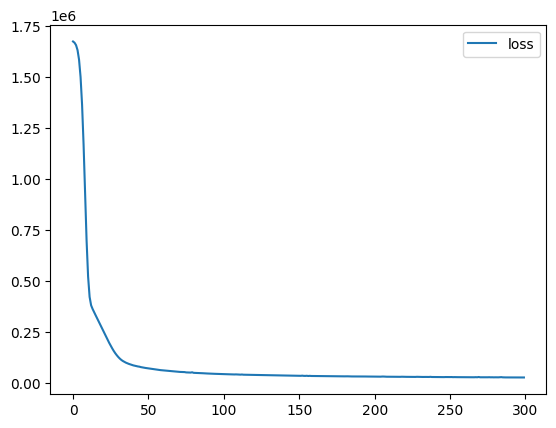

In [ ]:

# Training error metrics
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:

# Test/training data evaluations
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
48471.64453125

Train data evaluation:
27472.0


In [ ]:

# Get test predictions for evaluation metrics
test_predictions = model.predict(X_test)

test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

pred_df

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Test True Y,Model Predictions
0,1186.00,1344.934692
1,339.00,302.803955
2,2040.00,1827.917603
3,1099.00,1496.752075
4,999.00,957.073181
5,1499.00,1836.942383
6,1315.00,1309.678345
7,639.00,684.862915
8,1199.00,978.266479
9,2449.00,2155.292969


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

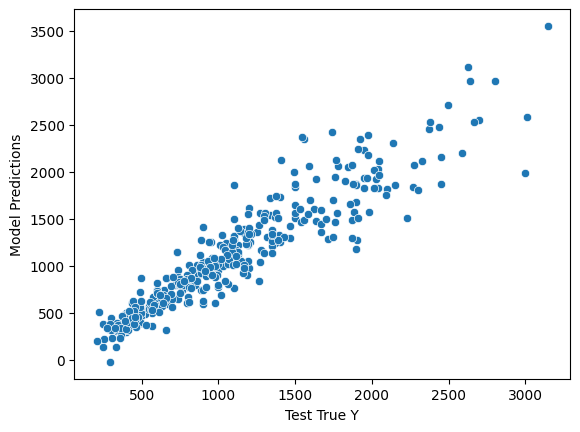

In [ ]:

# Metrics: do the predictions follow a linear line
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [ ]:

# Regression error metrics
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
154.44 $

MSE
48471.64 $^2

RMSE:
220.16 $

R-squared:
0.87

Explained variance score:
0.87


/var/folders/n8/nvm27clx6dz0_pkssl20wnnm0000gn/T/ipykernel_10302/1230579313.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


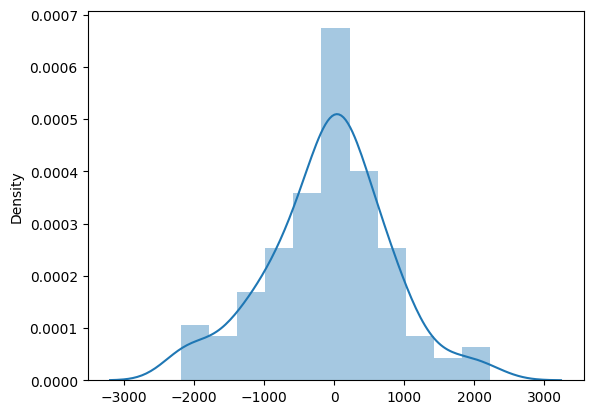

In [ ]:

# Plotting the predictions against the distribution (aka residual histogram)
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()